In [1]:
%pylab inline --no-import-all

########################################前処理部#############################################
import pandas as pd
import csv as csv
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn import grid_search
from sklearn import cross_validation

#trainはIdが1-1460,testは1461～
#csvファイルの読み込みデータフレームを作成
train_df = pd.read_csv('/Users/koujirou/Downloads/train.csv', header=0)

Populating the interactive namespace from numpy and matplotlib


/Users/koujirou/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/koujirou/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/koujirou/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed

In [2]:
print(train_df.shape)
train_df.sample(10)

(49108, 49)


,ID,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE
4817,4817,1,1,Forced Air,Y,NaN,4,2,1900.0,2013.0,...,Old City 2,040 A Old City 2,4600.0,NaN,Ward 5,553,-77.015425,38.909352,NW,599000.0
45421,45421,1,0,Hot Water Rad,Y,1.0,7,3,1915.0,2013.0,...,16th Street Heights,049 A 16th Street Heights,2501.0,002501 2009,Ward 4,2700,-77.033728,38.944609,NW,525000.0
9306,9306,1,0,Ht Pump,Y,NaN,3,1,1942.0,1982.0,...,Cleveland Park,NaN,1002.0,NaN,Ward 3,1820,-77.076369,38.936485,NW,322000.0
48024,48024,2,0,Forced Air,Y,NaN,5,2,2013.0,NaN,...,Barry Farms,NaN,7407.0,NaN,Ward 8,5869,-76.991486,38.859840,SE,249900.0
25284,25284,3,0,Forced Air,Y,1.0,9,3,1966.0,NaN,...,Fort Dupont Park,022 D Fort Dupont Park,9902.0,009902 1008,Ward 7,5367,-76.940204,38.870368,SE,350000.0
18844,18844,2,0,Hot Water Rad,Y,1.0,6,3,1908.0,2010.0,...,Old City 1,039 F Old City 1,8402.0,008402 1002,Ward 6,1027,-76.987389,38.899472,NE,880000.0
40618,40618,2,0,Hot Water Rad,N,1.0,11,4,1927.0,NaN,...,Columbia Heights,015 A Columbia Heights,2801.0,002801 2002,Ward 1,2688,-77.033740,38.936029,NW,327500.0
42426,42426,1,0,Hot Water Rad,N,1.0,6,3,1927.0,NaN,...,Brightwood,006 C Brightwood,1901.0,001901 3000,Ward 4,3198,-77.021174,38.966718,NW,185000.0
45029,45029,1,0,Forced Air,Y,NaN,4,1,2007.0,NaN,...,Old City 2,040 B Old City 2,4701.0,NaN,Ward 6,515,-77.017778,38.903148,NW,375900.0
6931,6931,1,0,Ht Pump,Y,NaN,4,1,2007.0,NaN,...,Old City 1,039 F Old City 1,8001.0,NaN,Ward 6,1030,-76.987283,38.895407,NE,470000.0


/Users/koujirou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/koujirou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/koujirou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

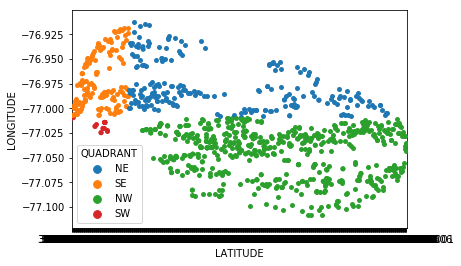

In [3]:
tree_df = train_df[train_df['QUADRANT'].isnull()==False]
tree_df_predict = train_df[train_df['QUADRANT'].isnull()==True]
tree_df['qua_flg'] = 1
tree_df_predict['qua_flg'] = 0

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(tree_df[['LATITUDE','LONGITUDE']], tree_df['QUADRANT'])
predict = clf.predict(tree_df_predict[['LATITUDE','LONGITUDE']])
tree_df_predict['QUADRANT']=predict
train2 = pd.concat([tree_df,tree_df_predict])
sns.swarmplot(x='LATITUDE',y='LONGITUDE',hue = 'QUADRANT' , data = train2.sample(1000))

In [4]:
resid_df = train2[train_df['SOURCE']=='Residential']
cond_df = train2[train_df['SOURCE']=='Condominium']

/Users/koujirou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/koujirou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [5]:
print(resid_df.shape)
print(cond_df.shape)

(28925, 50)
(20183, 50)


In [6]:
for i in [resid_df,cond_df]:
    row_num = i.shape[0]
    drop_list = (i.isnull().sum()[i.isnull().sum()==row_num].index.tolist())
    drop_list.extend(['X','Y','ASSESSMENT_SUBNBHD','ZIPCODE'])
    i.drop(drop_list,axis = 1,inplace = True)
    print(i.shape)

(28925, 45)
(20183, 31)


/Users/koujirou/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
cond_df['max_year'] = cond_df[['AYB','EYB','YR_RMDL']].max(axis = 1)
cond_df.drop(['AYB','EYB','YR_RMDL'],axis = 1,inplace = True)

/Users/koujirou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/koujirou/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
cond_df.isnull().sum()

ID                   0
BATHRM               0
HF_BATHRM            0
HEAT                 0
AC                   0
ROOMS                0
BEDRM                0
SALEDATE             0
QUALIFIED            0
SALE_NUM             0
BLDG_NUM             0
FIREPLACES           0
USECODE              0
LANDAREA             0
GIS_LAST_MOD_DTTM    0
SOURCE               0
CMPLX_NUM            0
LIVING_GBA           0
ZIPCODE              0
LATITUDE             0
LONGITUDE            0
ASSESSMENT_NBHD      0
CENSUS_TRACT         0
WARD                 0
SQUARE               0
QUADRANT             0
PRICE                0
qua_flg              0
max_year             0
dtype: int64

In [9]:
cond_df['SALEDATE'] = cond_df['SALEDATE'].str[:11].str.replace('-','').astype(int)

/Users/koujirou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
#one_hot_encoding
cond_df_dummy = pd.get_dummies(cond_df)

In [11]:
for k in cond_df_dummy.columns:
    print(k)

ID
BATHRM
HF_BATHRM
ROOMS
BEDRM
SALEDATE
SALE_NUM
BLDG_NUM
FIREPLACES
USECODE
LANDAREA
CMPLX_NUM
LIVING_GBA
ZIPCODE
LATITUDE
LONGITUDE
CENSUS_TRACT
PRICE
qua_flg
max_year
HEAT_Air Exchng
HEAT_Air-Oil
HEAT_Elec Base Brd
HEAT_Electric Rad
HEAT_Evp Cool
HEAT_Forced Air
HEAT_Gravity Furnac
HEAT_Hot Water Rad
HEAT_Ht Pump
HEAT_Ind Unit
HEAT_No Data
HEAT_Wall Furnace
HEAT_Warm Cool
HEAT_Water Base Brd
AC_0
AC_N
AC_Y
QUALIFIED_Q
QUALIFIED_U
GIS_LAST_MOD_DTTM_2018-07-22 18:01:38
SOURCE_Condominium
ASSESSMENT_NBHD_16th Street Heights
ASSESSMENT_NBHD_American University
ASSESSMENT_NBHD_Anacostia
ASSESSMENT_NBHD_Barry Farms
ASSESSMENT_NBHD_Berkley
ASSESSMENT_NBHD_Brentwood
ASSESSMENT_NBHD_Brightwood
ASSESSMENT_NBHD_Brookland
ASSESSMENT_NBHD_Burleith
ASSESSMENT_NBHD_Capitol Hill
ASSESSMENT_NBHD_Central-tri 1
ASSESSMENT_NBHD_Central-tri 3
ASSESSMENT_NBHD_Chevy Chase
ASSESSMENT_NBHD_Chillum
ASSESSMENT_NBHD_Cleveland Park
ASSESSMENT_NBHD_Columbia Heights
ASSESSMENT_NBHD_Congress Heights
ASSESSMENT_NB

In [12]:
cond_df_dummy.shape

(20183, 1058)

In [18]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf2 = linear_model.LinearRegression()
 
target = cond_df_dummy['PRICE']
explain = cond_df_dummy.drop('PRICE',axis = 1)

# 予測モデルを作成
clf2.fit(explain, target)

# 回帰係数
print(clf2.coef_)
 
# 切片 (誤差)
print(clf2.intercept_)
 
scores=cross_validation.cross_val_score(clf2,explain, target,cv=10,scoring="r2")
print("交差検証:n=10",np.mean(scores))

# 決定係数
print(clf2.score(explain,target))


[-3.33551477e+00 -5.30772378e+04 -1.31678298e+05 ... -2.30534021e+11
 -8.98412593e+11  3.19839580e+11]
8352712863023138.0
交差検証:n=10 -2773826.5198352453
0.6064466950147439


In [ ]:
#ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor
from sklearn import grid_search
forest=RandomForestRegressor(random_state=2)

# 試行するパラメータを羅列する
params = {'n_estimators'  : [3, 10, 100,1000],'n_estimators'  : [100,200] ,'n_jobs': [-1]}

rf = grid_search.GridSearchCV(forest,param_grid=params,cv=10,scoring="r2")

# グリッドサーチで優れたハイパーパラメータを探す
rf.fit(explain, target)

scores=cross_validation.cross_val_score(rf,explain, target,cv=10,scoring="r2")
print("交差検証:n=10",np.mean(scores))
    
#result_rf=rf.predict(x_selected_test)